In [33]:
!pwd

/data/vs1819/layer_systems/layer_system


In [34]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
pd.set_option('display.max_columns', None)

In [36]:
dfpar = pd.read_csv("AI_backtracking_parameters.csv") 
dfpar = dfpar.iloc[:,:-1]
dfpar

gravity  cap_pressure  black_oil  ov_relaxation  one_phase  wells  \
0         T             T          F              T          F      F   
1         T             T          F              T          F      F   
2         T             T          F              T          F      F   
3         T             T          F              T          F      F   
4         T             T          F              T          F      F   
..      ...           ...        ...            ...        ...    ...   
415       T             T          F              T          F      F   
416       T             T          F              T          F      F   
417       T             T          F              T          F      F   
418       T             T          F              T          F      F   
419       T             T          F              T          F      F   

      n_phases   n_components   aspect_ratio   courant_number  \
0          2.0            0.0            5.0         0.000000   
1          2.0            0.0            5.0         1.042319   
2          2.0            0.0            5.0        10.404967   
3          2.0            0.0            5.0        19.229685   
4          2.0            0.0            5.0         5.299107   
..         ...            ...            ...              ...   
415        2.0            0.0            5.0         8.322523   
416        2.0            0.0            5.0         8.322635   
417        2.0            0.0            5.0         8.322709   
418        2.0            0.0            5.0         8.322657   
419        2.0            0.0            5.0         8.322618   

      shockfront_courant_number   shockfront_number_ratio  \
0                      0.000000                  0.000000   
1                      0.000000                  0.000000   
2                     10.404967                  0.010301   
3                      0.684071                  0.008653   
4                      0.581456                  0.008859   
..                          ...                       ...   
415                    0.127925                  0.000206   
416                    0.127925                  0.000000   
417                    0.127925                  0.000000   
418                    0.118868                  0.000206   
419                    0.118868                  0.000000   

      min_total_mobility   max_total_mobility   average_total_mobility  \
0              200.00000            200.00000                200.00000   
1              200.00000            200.00000                200.00000   
2              166.71276           1000.00000                203.68323   
3              166.66670            490.04433                199.99602   
4              166.68628            968.72285                199.86565   
..                   ...                  ...                      ...   
415            166.66697            982.02888                504.72902   
416            166.66899            982.02923                504.71770   
417            166.66670            982.02930                504.72411   
418            166.66670            982.02930                504.72410   
419            166.66667            982.02930                504.72074   

      min_Darcy_velocity   max_Darcy_velocity   average_Darcy_velocity  \
0           1.071157e-07             0.000001             5.745931e-07   
1           1.324232e-07             0.000002             5.753311e-07   
2           8.445524e-08             0.000015             6.098395e-07   
3           1.767085e-07             0.000002             5.768940e-07   
4           1.205801e-07             0.000002             5.767642e-07   
..                   ...                  ...                      ...   
415         8.583326e-08             0.000008             1.405640e-06   
416         8.583765e-08             0.000008             1.405638e-06   
417         8.582708e-08             0.000008             

In [37]:
dfpar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 46 columns):
gravity                            420 non-null object
 cap_pressure                      420 non-null object
 black_oil                         420 non-null object
 ov_relaxation                     420 non-null object
 one_phase                         420 non-null object
 wells                             420 non-null object
 n_phases                          420 non-null float64
 n_components                      420 non-null float64
 aspect_ratio                      420 non-null float64
 courant_number                    420 non-null float64
 shockfront_courant_number         420 non-null float64
 shockfront_number_ratio           420 non-null float64
 min_total_mobility                420 non-null float64
 max_total_mobility                420 non-null float64
 average_total_mobility            420 non-null float64
 min_Darcy_velocity                420 non-null float64
 max_

In [38]:
dfiter = pd.read_csv("non_linear_iterations.csv") 
dfiter = dfiter.iloc[:,:-1]
dfiter

time_step   outer_nonlinear_iteration   Inner_non_linear_iterations
0            1                           1                             1
1            1                           2                             1
2            1                           3                            51
3            1                           4                            12
4            1                           5                            51
..         ...                         ...                           ...
415        100                           5                             1
416        100                           6                             1
417        100                           7                             1
418        100                           8                             1
419        100                           9                             4

[420 rows x 3 columns]

In [39]:
dfiter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
time_step                       420 non-null int64
 outer_nonlinear_iteration      420 non-null int64
 Inner_non_linear_iterations    420 non-null int64
dtypes: int64(3)
memory usage: 10.0 KB


In [40]:
df = pd.concat([dfpar,dfiter], axis=1)
df.columns = df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 49 columns):
gravity                           420 non-null object
cap_pressure                      420 non-null object
black_oil                         420 non-null object
ov_relaxation                     420 non-null object
one_phase                         420 non-null object
wells                             420 non-null object
n_phases                          420 non-null float64
n_components                      420 non-null float64
aspect_ratio                      420 non-null float64
courant_number                    420 non-null float64
shockfront_courant_number         420 non-null float64
shockfront_number_ratio           420 non-null float64
min_total_mobility                420 non-null float64
max_total_mobility                420 non-null float64
average_total_mobility            420 non-null float64
min_Darcy_velocity                420 non-null float64
max_Darcy_velocity   

In [41]:
df = df[3:]
df

gravity cap_pressure black_oil ov_relaxation one_phase wells  n_phases  \
3         T            T         F             T         F     F       2.0   
4         T            T         F             T         F     F       2.0   
5         T            T         F             T         F     F       2.0   
6         T            T         F             T         F     F       2.0   
7         T            T         F             T         F     F       2.0   
..      ...          ...       ...           ...       ...   ...       ...   
415       T            T         F             T         F     F       2.0   
416       T            T         F             T         F     F       2.0   
417       T            T         F             T         F     F       2.0   
418       T            T         F             T         F     F       2.0   
419       T            T         F             T         F     F       2.0   

     n_components  aspect_ratio  courant_number  shockfront_courant_number  \
3             0.0           5.0       19.229685                   0.684071   
4             0.0           5.0        5.299107                   0.581456   
5             0.0           5.0        2.292735                   0.923438   
6             0.0           5.0        3.047977                   1.597452   
7             0.0           5.0        5.444659                   4.498906   
..            ...           ...             ...                        ...   
415           0.0           5.0        8.322523                   0.127925   
416           0.0           5.0        8.322635                   0.127925   
417           0.0           5.0        8.322709                   0.127925   
418           0.0           5.0        8.322657                   0.118868   
419           0.0           5.0        8.322618                   0.118868   

     shockfront_number_ratio  min_total_mobility  max_total_mobility  \
3                   0.008653           166.66670           490.04433   
4                   0.008859           166.68628           968.72285   
5                   0.008241           166.66907           246.57504   
6                   0.008447           166.67115           254.91503   
7                   0.010713           166.68319           648.00000   
..                       ...                 ...                 ...   
415                 0.000206           166.66697           982.02888   
416                 0.000000           166.66899           982.02923   
417                 0.000000           166.66670           982.02930   
418                 0.000206           166.66670           982.02930   
419                 0.000000           166.66667           982.02930   

     average_total_mobility  min_Darcy_velocity  max_Darcy_velocity  \
3                 199.99602        1.767085e-07        2.480314e-06   
4                 199.86565        1.205801e-07        2.140086e-06   
5                 199.41814        1.500879e-07        2.004821e-06   
6                 199.47242        1.344768e-07        1.645575e-06   
7                 201.87791        6.957501e-08        9.374677e-07   
..                      ...                 ...                 ...   
415               504.72902        8.583326e-08        8.248482e-06   
416               504.71770        8.583765e-08        8.248570e-06   
417               504.72411        8.582708e-08        8.248520e-06   
418               504.72410        8.582866e-08        8.248480e-06   
419               504.72074        8.583811e-08        8.248587e-06   

     average_Darcy_velocity  min_shockfront_mobratio  max_shockfront_mobratio  \
3              5.768940e-07                 0.856243                 1.368530   
4              5.767642e-07                 0.868369                 1.031068   
5              5.745376e-07                 0.871792                 1.191052   
6              5.735424e-07                 0.855419                 1.093274   
7      

In [42]:
df.describe()

n_phases  n_components  aspect_ratio  courant_number  \
count     417.0         417.0         417.0      417.000000   
mean        2.0           0.0           5.0        6.036781   
std         0.0           0.0           0.0        1.598133   
min         2.0           0.0           5.0        2.174727   
25%         2.0           0.0           5.0        4.922655   
50%         2.0           0.0           5.0        5.993874   
75%         2.0           0.0           5.0        7.254427   
max         2.0           0.0           5.0       19.229685   

       shockfront_courant_number  shockfront_number_ratio  min_total_mobility  \
count                 417.000000               417.000000          417.000000   
mean                    0.631119                 0.007961          166.672559   
std                     0.269503                 0.004607            0.018069   
min                     0.054872                 0.000000          166.666670   
25%                     0.545146                 0.004326          166.666800   
50%                     0.614095                 0.007829          166.667660   
75%                     0.705164                 0.010919          166.670210   
max                     4.498906                 0.021632          166.888380   

       max_total_mobility  average_total_mobility  min_Darcy_velocity  \
count          417.000000              417.000000        4.170000e+02   
mean           930.932842              331.435271        6.363708e-08   
std             96.856998               93.548813        1.634126e-08   
min            246.575040              199.418140        4.572445e-08   
25%            935.651680              249.994810        5.234060e-08   
50%            962.994140              309.122160        5.628801e-08   
75%            975.272250              411.153530        8.111542e-08   
max            982.029300              504.729020        1.767085e-07   

       max_Darcy_velocity  average_Darcy_velocity  min_shockfront_mobratio  \
count        4.170000e+02            4.170000e+02               417.000000   
mean         5.694722e-06            8.960081e-07                 0.867165   
std          1.738389e-06            2.566700e-07                 0.025961   
min          9.374677e-07            5.735424e-07                 0.837292   
25%          4.526753e-06            6.822480e-07                 0.850397   
50%          5.796160e-06            8.058307e-07                 0.858282   
75%          7.126471e-06            1.105363e-06                 0.879306   
max          8.248587e-06            1.405644e-06                 1.000000   

       max_shockfront_mobratio  average_shockfront_mobratio  \
count               417.000000                   417.000000   
mean                  1.034700                     0.927281   
std                   0.142775                     0.019352   
min                   0.891644                     0.885191   
25%                   0.984828                     0.912458   
50%                   1.018394                     0.927741   
75%                   1.056927                     0.938538   
max                   3.658608                     1.000000   

       average_longitudinal_capillary  average_transverse_capillary  \
count                      417.000000                    417.000000   
mean                         0.000442                      0.011040   
std                          0.000109                      0.002717   
min                          0.000264                      0.006610   
25%                          0.000333                      0.008331   
50%                          0.000463                      0.011574   
75%                          0.000543                      0.013574   
max                          0.000597                      0.014920   

       max_longitudinal_capillary  max_transverse_capillary  \
count                  417.000000                417.000000   
mean          

In [43]:
norm_df = df.copy()
column_names_to_normalize = df.columns.values[9:]
X = df[column_names_to_normalize].values
X_scaled = preprocessing.scale(X)
norm_df[column_names_to_normalize] = X_scaled
norm_df

/home/viluiz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


gravity cap_pressure black_oil ov_relaxation one_phase wells  n_phases  \
3         T            T         F             T         F     F       2.0   
4         T            T         F             T         F     F       2.0   
5         T            T         F             T         F     F       2.0   
6         T            T         F             T         F     F       2.0   
7         T            T         F             T         F     F       2.0   
..      ...          ...       ...           ...       ...   ...       ...   
415       T            T         F             T         F     F       2.0   
416       T            T         F             T         F     F       2.0   
417       T            T         F             T         F     F       2.0   
418       T            T         F             T         F     F       2.0   
419       T            T         F             T         F     F       2.0   

     n_components  aspect_ratio  courant_number  shockfront_courant_number  \
3             0.0           5.0        8.265112                   0.196713   
4             0.0           5.0       -0.462139                  -0.184499   
5             0.0           5.0       -2.345576                   1.085963   
6             0.0           5.0       -1.872430                   3.589919   
7             0.0           5.0       -0.370953                  14.368799   
..            ...           ...             ...                        ...   
415           0.0           5.0        1.431976                  -1.869363   
416           0.0           5.0        1.432046                  -1.869363   
417           0.0           5.0        1.432092                  -1.869363   
418           0.0           5.0        1.432059                  -1.903010   
419           0.0           5.0        1.432035                  -1.903010   

     shockfront_number_ratio  min_total_mobility  max_total_mobility  \
3                   0.150297           -0.324649           -4.557421   
4                   0.195064            0.760276            0.390632   
5                   0.060763           -0.193327           -7.074139   
6                   0.105530           -0.078075           -6.987929   
7                   0.597966            0.589060           -2.924649   
..                       ...                 ...                 ...   
415                -1.685147           -0.309688            0.528175   
416                -1.729914           -0.197760            0.528178   
417                -1.729914           -0.324649            0.528179   
418                -1.685147           -0.324649            0.528179   
419                -1.729914           -0.326311            0.528179   

     average_total_mobility  min_Darcy_velocity  max_Darcy_velocity  \
3                 -1.406722            6.927692           -1.851294   
4                 -1.408117            3.488803           -2.047243   
5                 -1.412906            5.296695           -2.125147   
6                 -1.412325            4.340230           -2.332050   
7                 -1.386581            0.363806           -2.739875   
..                      ...                 ...                 ...   
415                1.854667            1.359922            1.470803   
416                1.854546            1.360191            1.470854   
417                1.854615            1.359543            1.470825   
418                1.854614            1.359640            1.470802   
419                1.854579            1.360219            1.470864   

     average_Darcy_velocity  min_shockfront_mobratio  max_shockfront_mobratio  \
3                 -1.244779                -0.421199                 2.340969   
4                 -1.245285                 0.046455                -0.025465   
5                 -1.253971                 0.178462                 1.096417   
6                 -1.257853                -0.452975                 0.410751   
7      

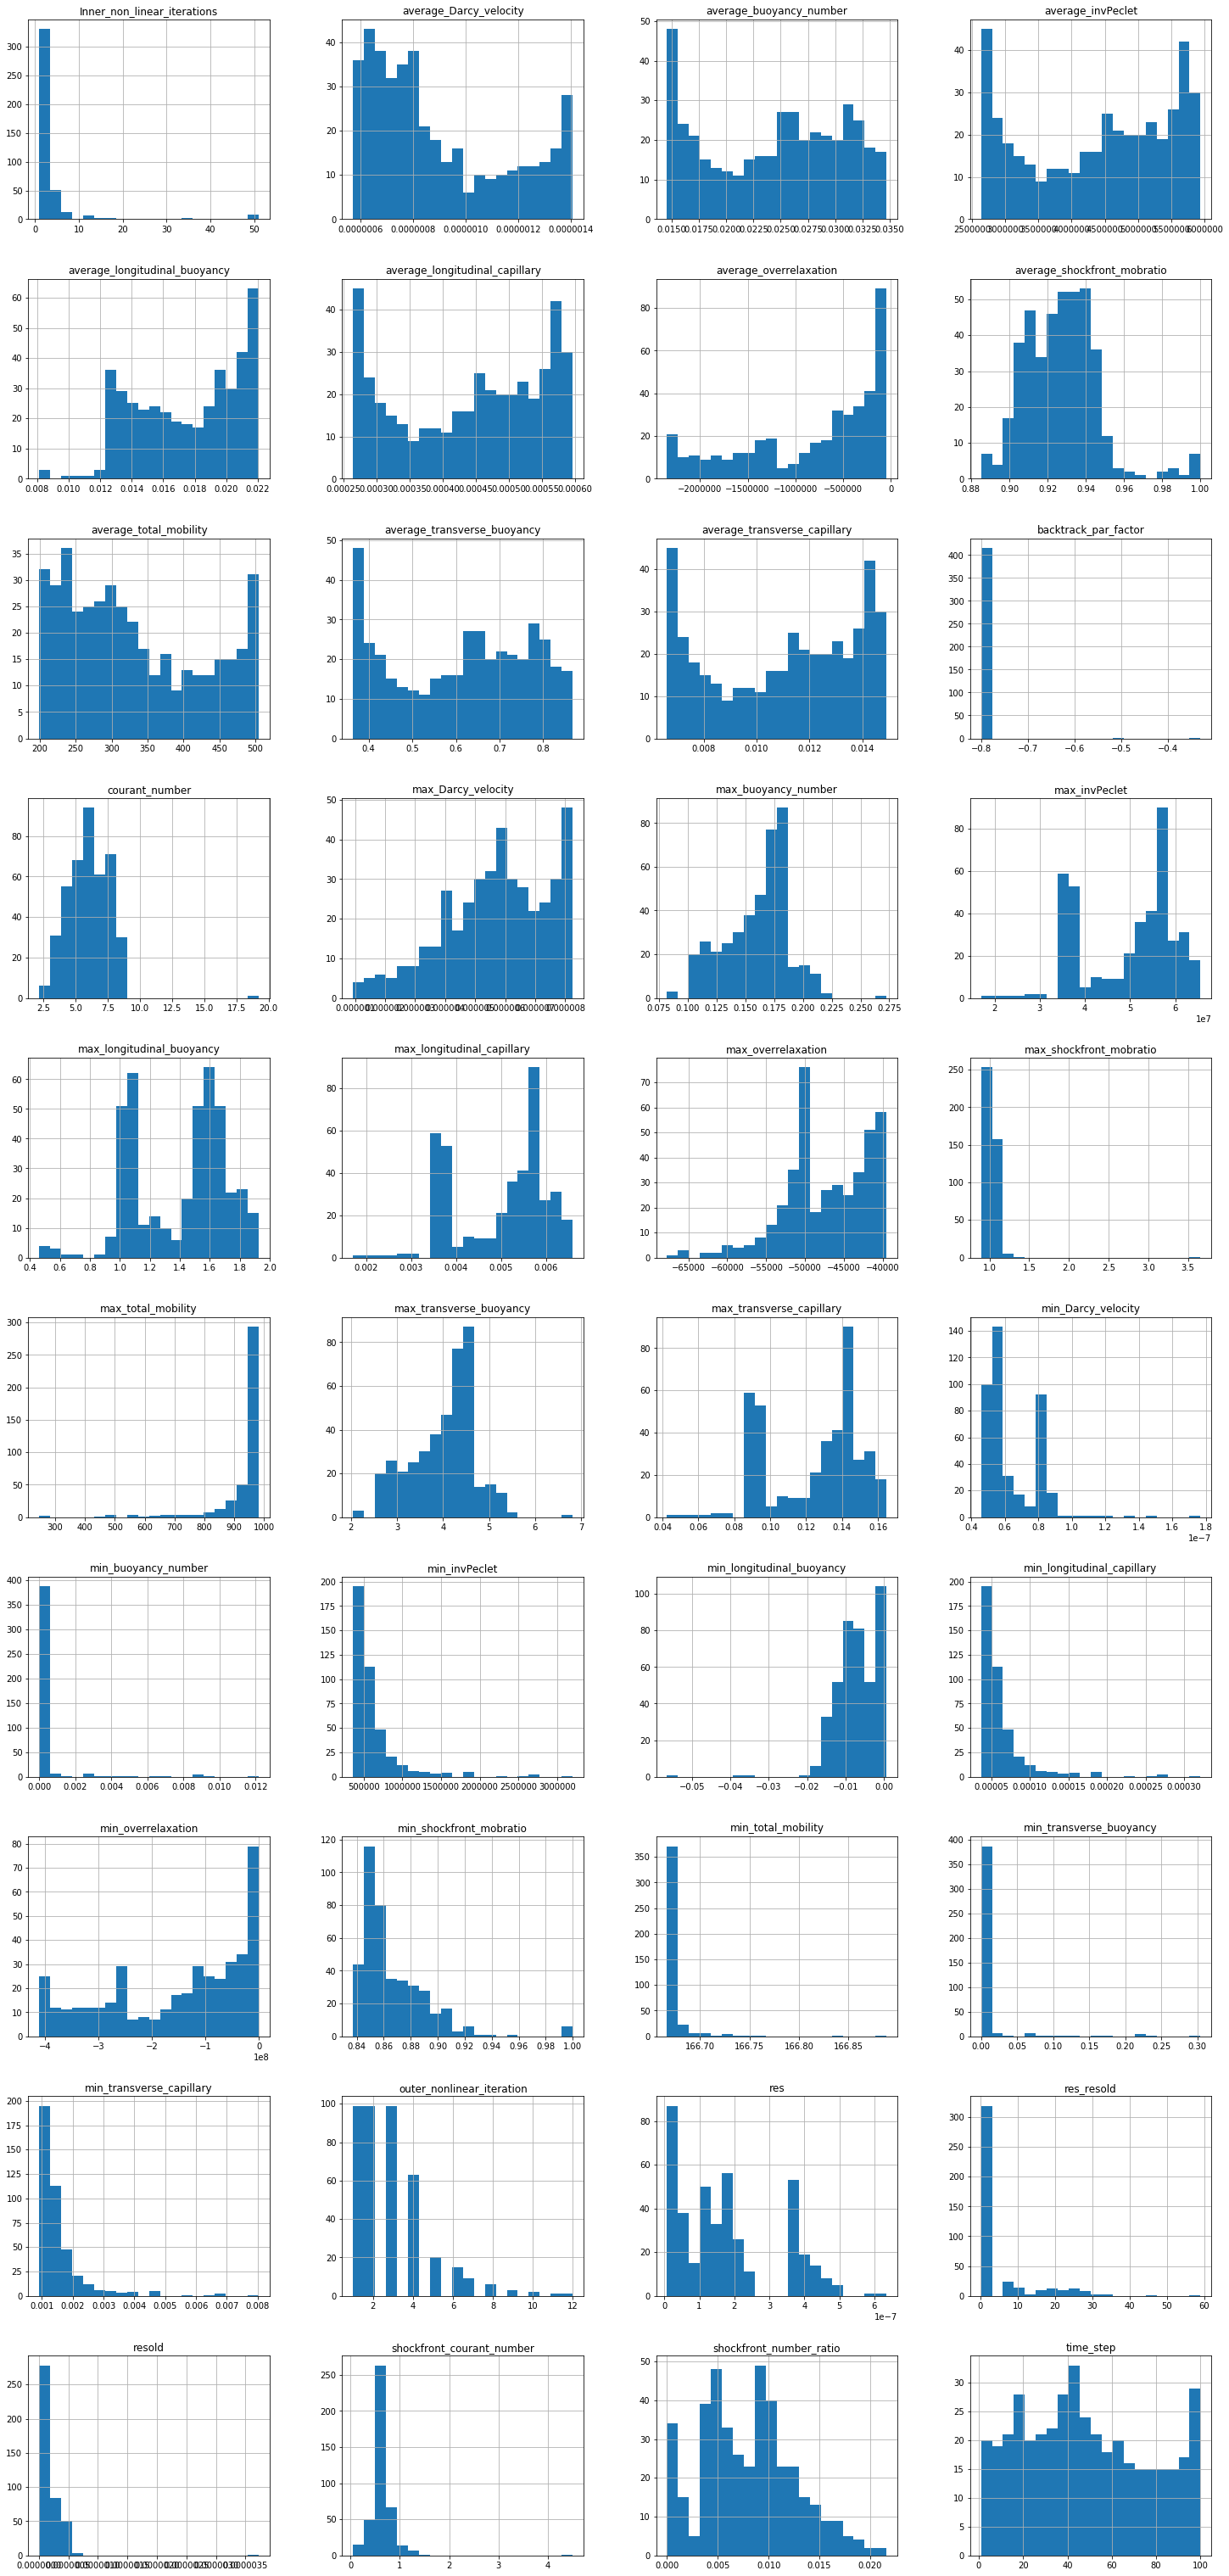

In [44]:
df.iloc[:,9:].hist(alpha=1.,figsize = (25,55), layout=(10,4), bins=20);
# norm_df.iloc[:,8:42].hist(alpha=1.,figsize = (20,30), bins=20);

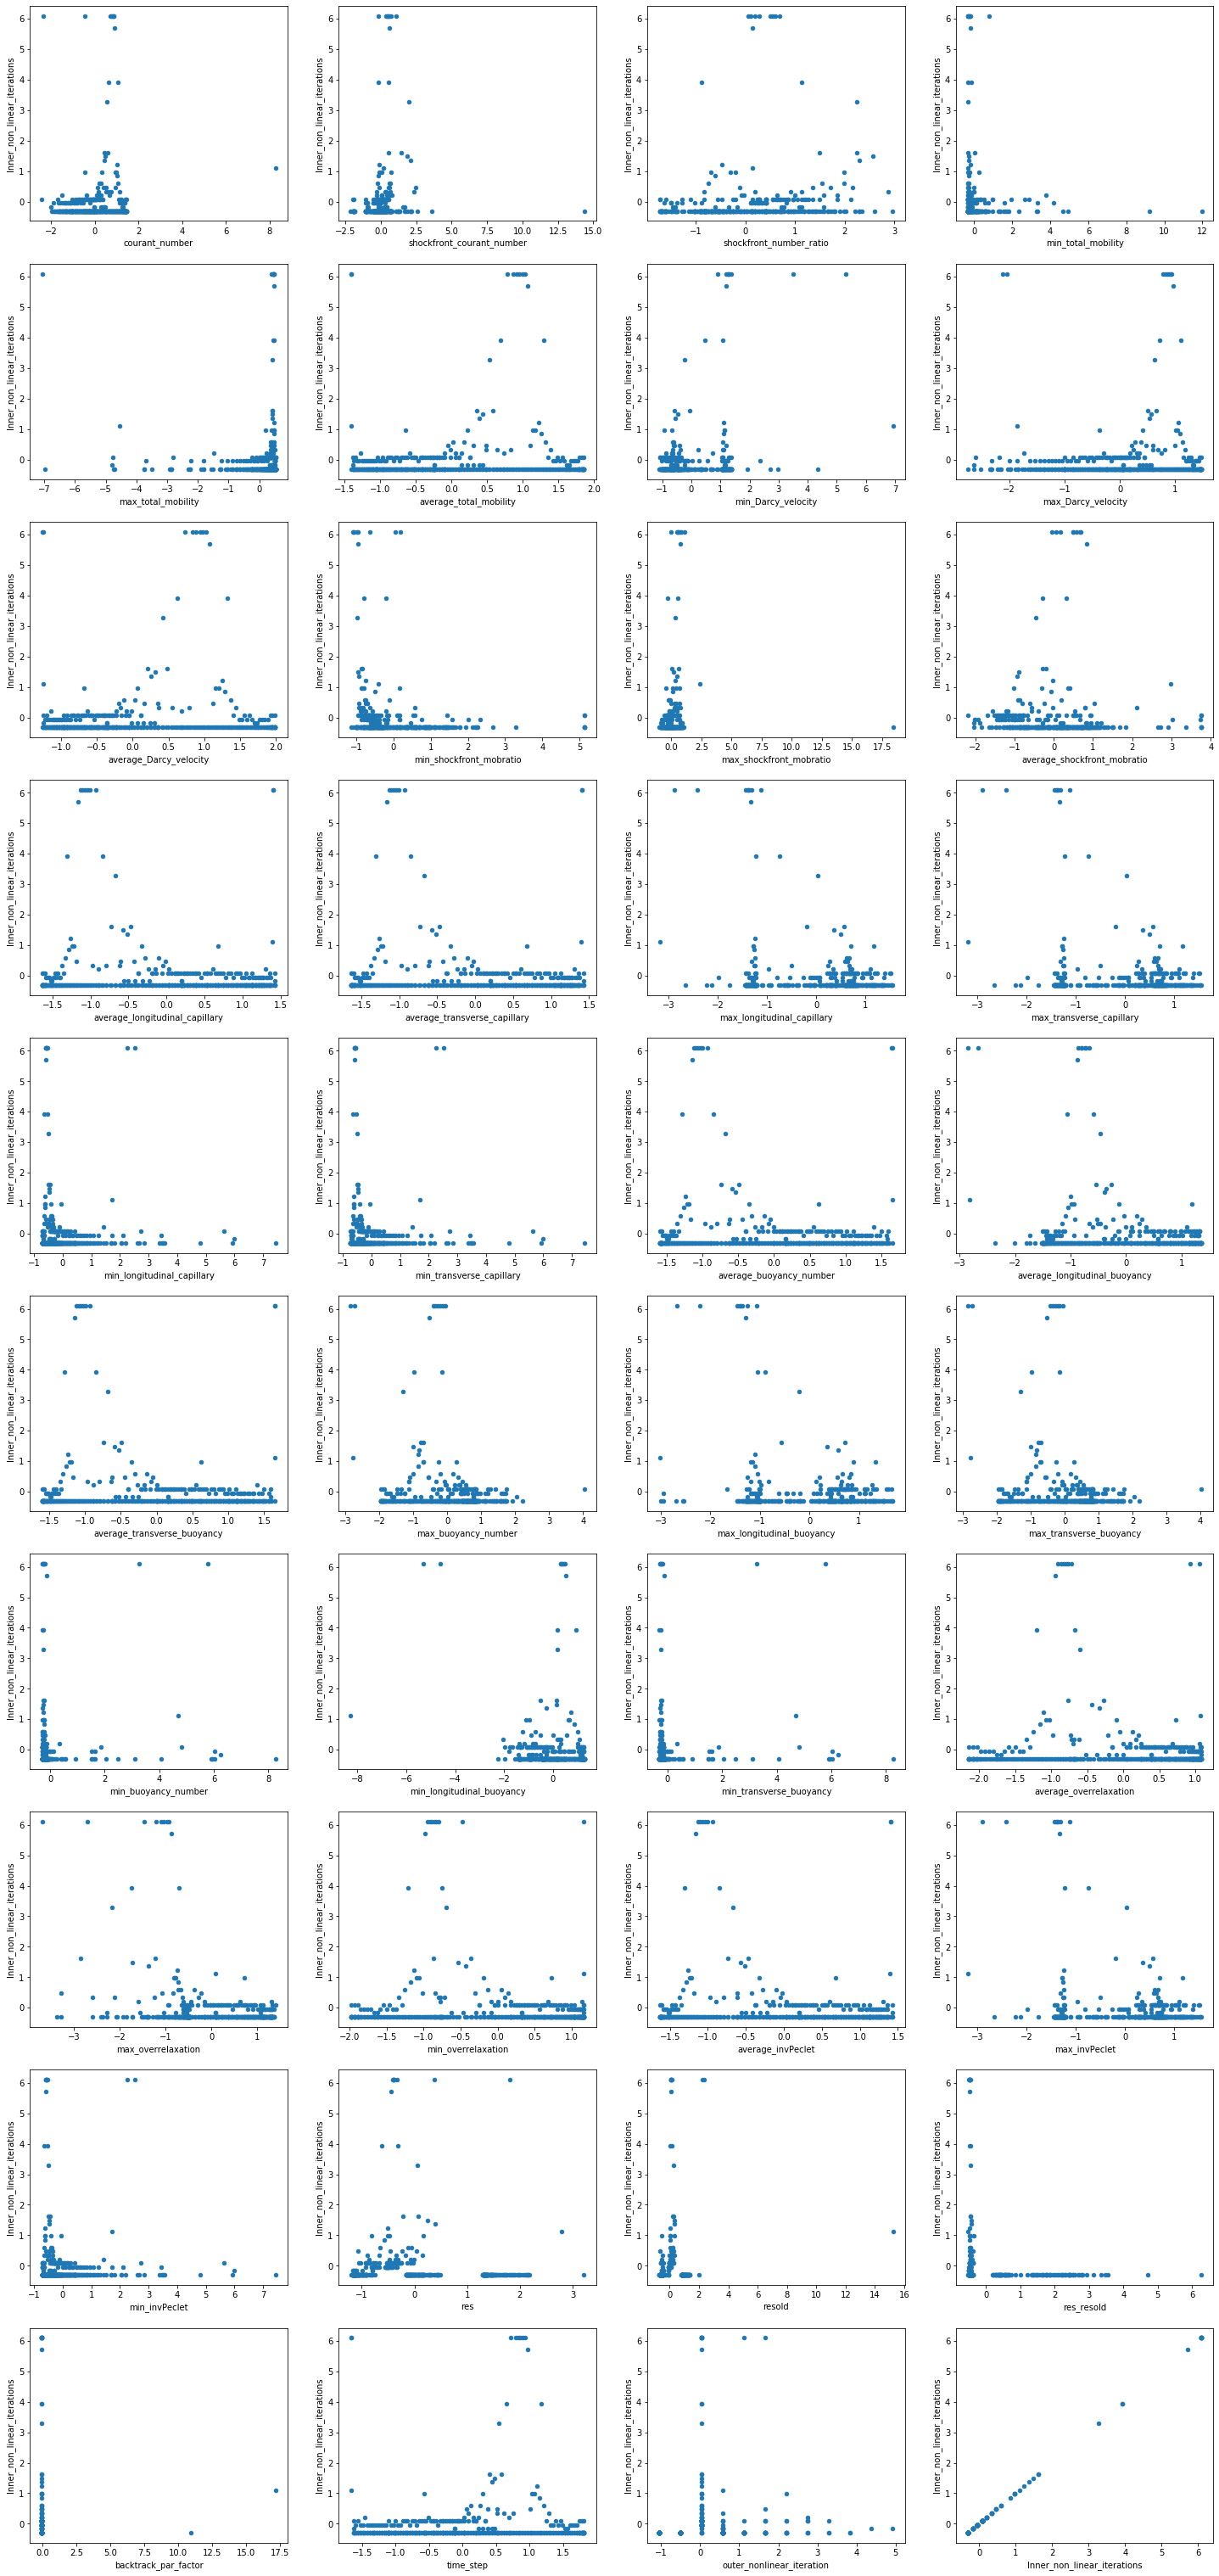

In [45]:
fig, axes = plt.subplots(10, 4, figsize=[25,55])
for i in range(0,40):
    #df.plot.scatter(x=i+9, y=48,  ax=axes[i//4,i%4]);
    norm_df.plot.scatter(x=i+9, y=48,  ax=axes[i//4,i%4])
#for i in range(39,40):
#    fig.delaxes(axes[i//4,i%4])

In [46]:
#pd.plotting.scatter_matrix(norm_df.iloc[:,11:42], alpha=0.8, figsize=(30, 30), diagonal='kde');

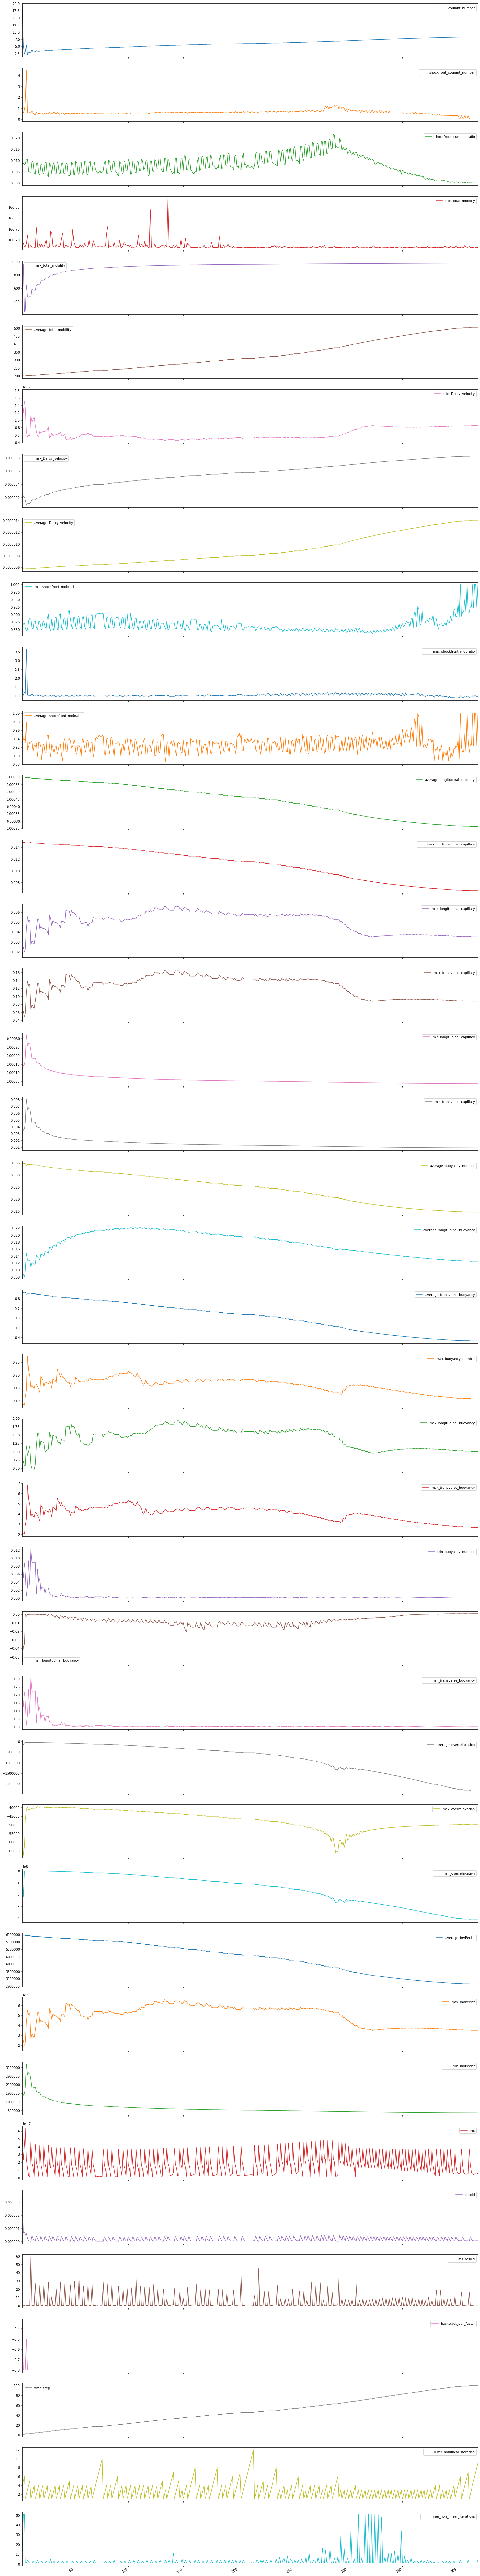

In [47]:
df.iloc[:,9:].plot(subplots=True, figsize=(25, 160));

In [48]:
df_corr_matrix = df.corr()
#df_corr_matrix['Inner_non_linear_iterations'].sort_values(ascending=False)
abs(df_corr_matrix['Inner_non_linear_iterations']).sort_values(ascending=False)

Inner_non_linear_iterations       1.000000
max_overrelaxation                0.306987
min_Darcy_velocity                0.284706
max_longitudinal_capillary        0.241201
max_invPeclet                     0.241201
max_transverse_capillary          0.241201
max_longitudinal_buoyancy         0.232031
average_longitudinal_buoyancy     0.206990
min_shockfront_mobratio           0.179148
max_buoyancy_number               0.164946
max_transverse_buoyancy           0.164946
shockfront_number_ratio           0.148760
min_longitudinal_buoyancy         0.138833
resold                            0.138515
res_resold                        0.137424
shockfront_courant_number         0.127812
min_overrelaxation                0.126793
average_transverse_capillary      0.118836
average_invPeclet                 0.118836
average_longitudinal_capillary    0.118836
courant_number                    0.114358
average_transverse_buoyancy       0.109652
average_buoyancy_number           0.109652
min_transve

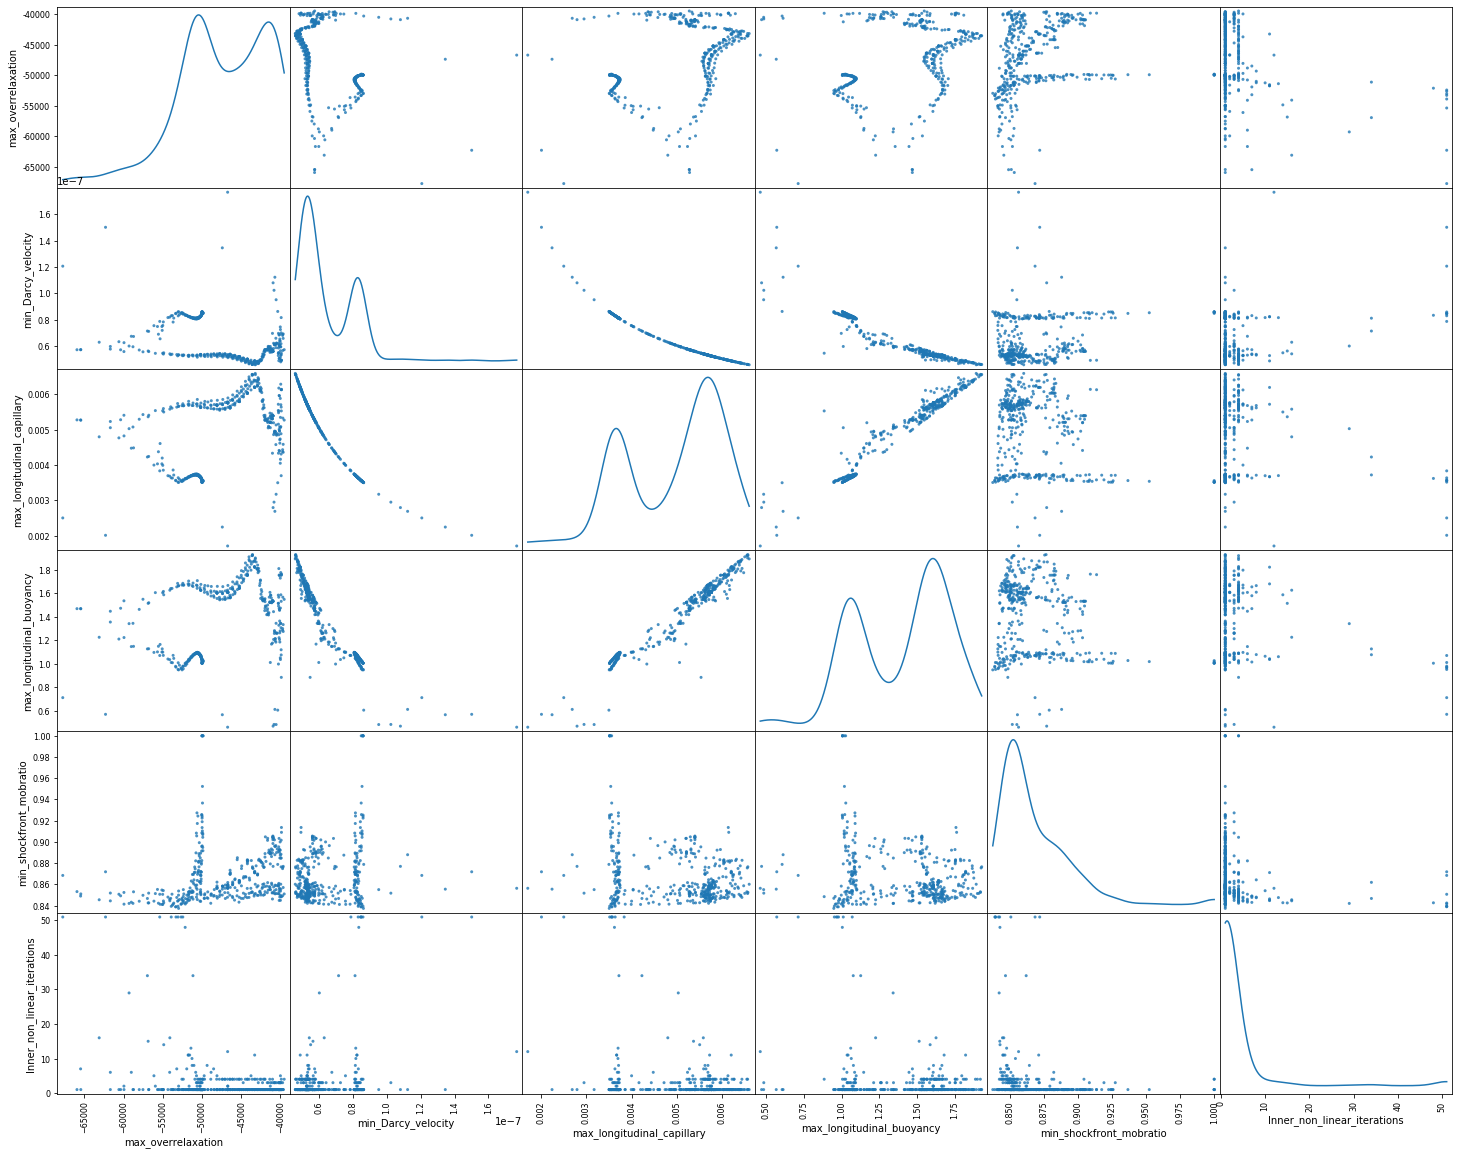

In [62]:
attributes = ['max_overrelaxation', 
              'min_Darcy_velocity', 
              'max_longitudinal_capillary', 
              'max_longitudinal_buoyancy', 
              'min_shockfront_mobratio', 
              'Inner_non_linear_iterations']
pd.plotting.scatter_matrix(df[attributes], figsize=(25,20), alpha=0.8, diagonal='kde');

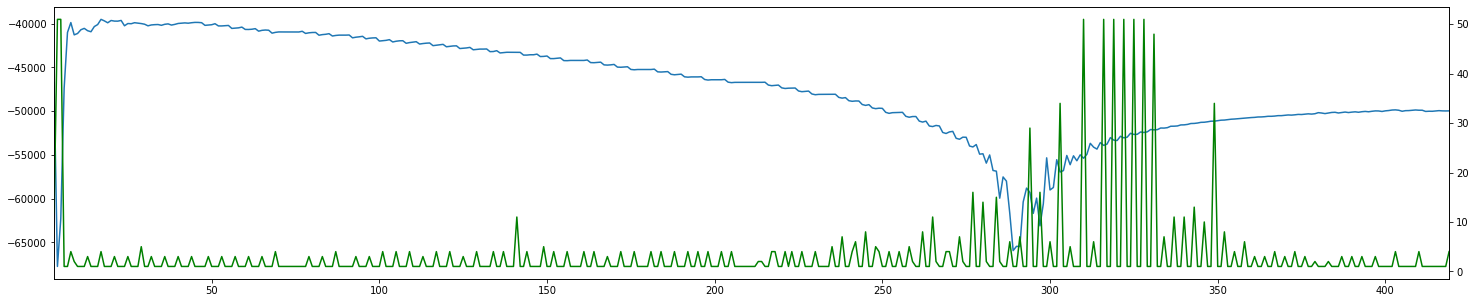

In [50]:
df['max_overrelaxation'].plot(figsize=(25, 5))
df['Inner_non_linear_iterations'].plot(secondary_y=True, style='g')

In [51]:
#df_corr_matrix['Inner_non_linear_iterations'].sort_values(ascending=False)
abs(df_corr_matrix['res']).sort_values(ascending=False)

res                               1.000000
outer_nonlinear_iteration         0.740316
res_resold                        0.731326
min_Darcy_velocity                0.181410
max_overrelaxation                0.164186
average_longitudinal_buoyancy     0.160158
shockfront_courant_number         0.151581
max_transverse_capillary          0.145716
max_invPeclet                     0.145716
max_longitudinal_capillary        0.145716
max_buoyancy_number               0.141720
max_transverse_buoyancy           0.141720
max_longitudinal_buoyancy         0.140163
max_shockfront_mobratio           0.135743
min_shockfront_mobratio           0.129097
backtrack_par_factor              0.127184
min_buoyancy_number               0.118752
min_transverse_buoyancy           0.118752
average_shockfront_mobratio       0.105651
shockfront_number_ratio           0.104086
courant_number                    0.101049
max_total_mobility                0.097922
resold                            0.089586
min_longitu

In [52]:
df2 = df[df.outer_nonlinear_iteration != 1]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 3 to 419
Data columns (total 49 columns):
gravity                           318 non-null object
cap_pressure                      318 non-null object
black_oil                         318 non-null object
ov_relaxation                     318 non-null object
one_phase                         318 non-null object
wells                             318 non-null object
n_phases                          318 non-null float64
n_components                      318 non-null float64
aspect_ratio                      318 non-null float64
courant_number                    318 non-null float64
shockfront_courant_number         318 non-null float64
shockfront_number_ratio           318 non-null float64
min_total_mobility                318 non-null float64
max_total_mobility                318 non-null float64
average_total_mobility            318 non-null float64
min_Darcy_velocity                318 non-null float64
max_Darcy_velocity   

In [53]:
df2.describe()

n_phases  n_components  aspect_ratio  courant_number  \
count     318.0         318.0         318.0      318.000000   
mean        2.0           0.0           5.0        6.019150   
std         0.0           0.0           0.0        1.627644   
min         2.0           0.0           5.0        2.174727   
25%         2.0           0.0           5.0        4.921072   
50%         2.0           0.0           5.0        5.993731   
75%         2.0           0.0           5.0        7.152190   
max         2.0           0.0           5.0       19.229685   

       shockfront_courant_number  shockfront_number_ratio  min_total_mobility  \
count                 318.000000               318.000000          318.000000   
mean                    0.630635                 0.008416          166.673109   
std                     0.289513                 0.004753            0.019542   
min                     0.090774                 0.000000          166.666670   
25%                     0.546444                 0.004944          166.666810   
50%                     0.614996                 0.008859          166.667710   
75%                     0.698994                 0.011125          166.670535   
max                     4.498906                 0.021632          166.888380   

       max_total_mobility  average_total_mobility  min_Darcy_velocity  \
count          318.000000              318.000000        3.180000e+02   
mean           931.438877              329.185727        6.289561e-08   
std             93.380246               93.228917        1.635717e-08   
min            246.575040              199.418140        4.572445e-08   
25%            934.293768              249.963123        5.205750e-08   
50%            962.991750              309.117400        5.588077e-08   
75%            974.556670              402.236115        8.063590e-08   
max            982.029300              504.729020        1.767085e-07   

       max_Darcy_velocity  average_Darcy_velocity  min_shockfront_mobratio  \
count        3.180000e+02            3.180000e+02               318.000000   
mean         5.662908e-06            8.896395e-07                 0.865710   
std          1.730055e-06            2.560223e-07                 0.027358   
min          9.374677e-07            5.745376e-07                 0.838813   
25%          4.523105e-06            6.822183e-07                 0.849611   
50%          5.796029e-06            8.057714e-07                 0.856821   
75%          7.020154e-06            1.076822e-06                 0.872207   
max          8.248587e-06            1.405644e-06                 1.000000   

       max_shockfront_mobratio  average_shockfront_mobratio  \
count               318.000000                   318.000000   
mean                  1.031360                     0.924165   
std                   0.157883                     0.019726   
min                   0.891644                     0.885191   
25%                   0.991143                     0.910304   
50%                   1.017651                     0.922260   
75%                   1.042151                     0.934045   
max                   3.658608                     1.000000   

       average_longitudinal_capillary  average_transverse_capillary  \
count                      318.000000                    318.000000   
mean                         0.000444                      0.011112   
std                          0.000108                      0.002700   
min                          0.000264                      0.006610   
25%                          0.000342                      0.008556   
50%                          0.000463                      0.011575   
75%                          0.000543                      0.013578   
max                          0.000597                      0.014920   

       max_longitudinal_capillary  max_transverse_capillary  \
count                  318.000000                318.000000   
mean          

In [54]:
norm_df2 = df2.copy()
column_names_to_normalize = df2.columns.values[9:]
X = df2[column_names_to_normalize].values
X_scaled = preprocessing.scale(X)
norm_df2[column_names_to_normalize] = X_scaled
norm_df2

/home/viluiz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


gravity cap_pressure black_oil ov_relaxation one_phase wells  n_phases  \
3         T            T         F             T         F     F       2.0   
4         T            T         F             T         F     F       2.0   
5         T            T         F             T         F     F       2.0   
7         T            T         F             T         F     F       2.0   
8         T            T         F             T         F     F       2.0   
..      ...          ...       ...           ...       ...   ...       ...   
415       T            T         F             T         F     F       2.0   
416       T            T         F             T         F     F       2.0   
417       T            T         F             T         F     F       2.0   
418       T            T         F             T         F     F       2.0   
419       T            T         F             T         F     F       2.0   

     n_components  aspect_ratio  courant_number  shockfront_courant_number  \
3             0.0           5.0        8.129146                   0.184863   
4             0.0           5.0       -0.443081                  -0.170134   
5             0.0           5.0       -2.293062                   1.012962   
7             0.0           5.0       -0.353515                  13.382384   
8             0.0           5.0       -2.365678                  -0.128697   
..            ...           ...             ...                        ...   
415           0.0           5.0        1.417388                  -1.739136   
416           0.0           5.0        1.417457                  -1.739136   
417           0.0           5.0        1.417502                  -1.739136   
418           0.0           5.0        1.417470                  -1.770469   
419           0.0           5.0        1.417447                  -1.770469   

     shockfront_number_ratio  min_total_mobility  max_total_mobility  \
3                   0.049966           -0.328456           -4.734301   
4                   0.093378            0.675059            0.399900   
5                  -0.036860           -0.206989           -7.345699   
7                   0.484092            0.516690           -3.040103   
8                   0.440680            2.431978           -4.965270   
..                       ...                 ...                 ...   
415                -1.729954           -0.314618            0.542617   
416                -1.773366           -0.211089            0.542621   
417                -1.773366           -0.328456            0.542622   
418                -1.729954           -0.328456            0.542622   
419                -1.773366           -0.329994            0.542622   

     average_total_mobility  min_Darcy_velocity  max_Darcy_velocity  \
3                 -1.387910            6.968947           -1.842491   
4                 -1.389310            3.532117           -2.039458   
5                 -1.394118            5.338926           -2.117766   
7                 -1.367692            0.408990           -2.735686   
8                 -1.370415           -0.513434           -2.602660   
..                      ...                 ...                 ...   
415                1.885895            1.404510            1.496859   
416                1.885773            1.404778            1.496910   
417                1.885842            1.404131            1.496881   
418                1.885842            1.404228            1.496858   
419                1.885806            1.404807            1.496920   

     average_Darcy_velocity  min_shockfront_mobratio  max_shockfront_mobratio  \
3                 -1.223481                -0.346596                 2.138936   
4                 -1.223989                 0.097338                -0.001849   
5                 -1.232699                 0.222649                 1.013057   
7                 -1.222004                -0.716626                16.666717   
8      

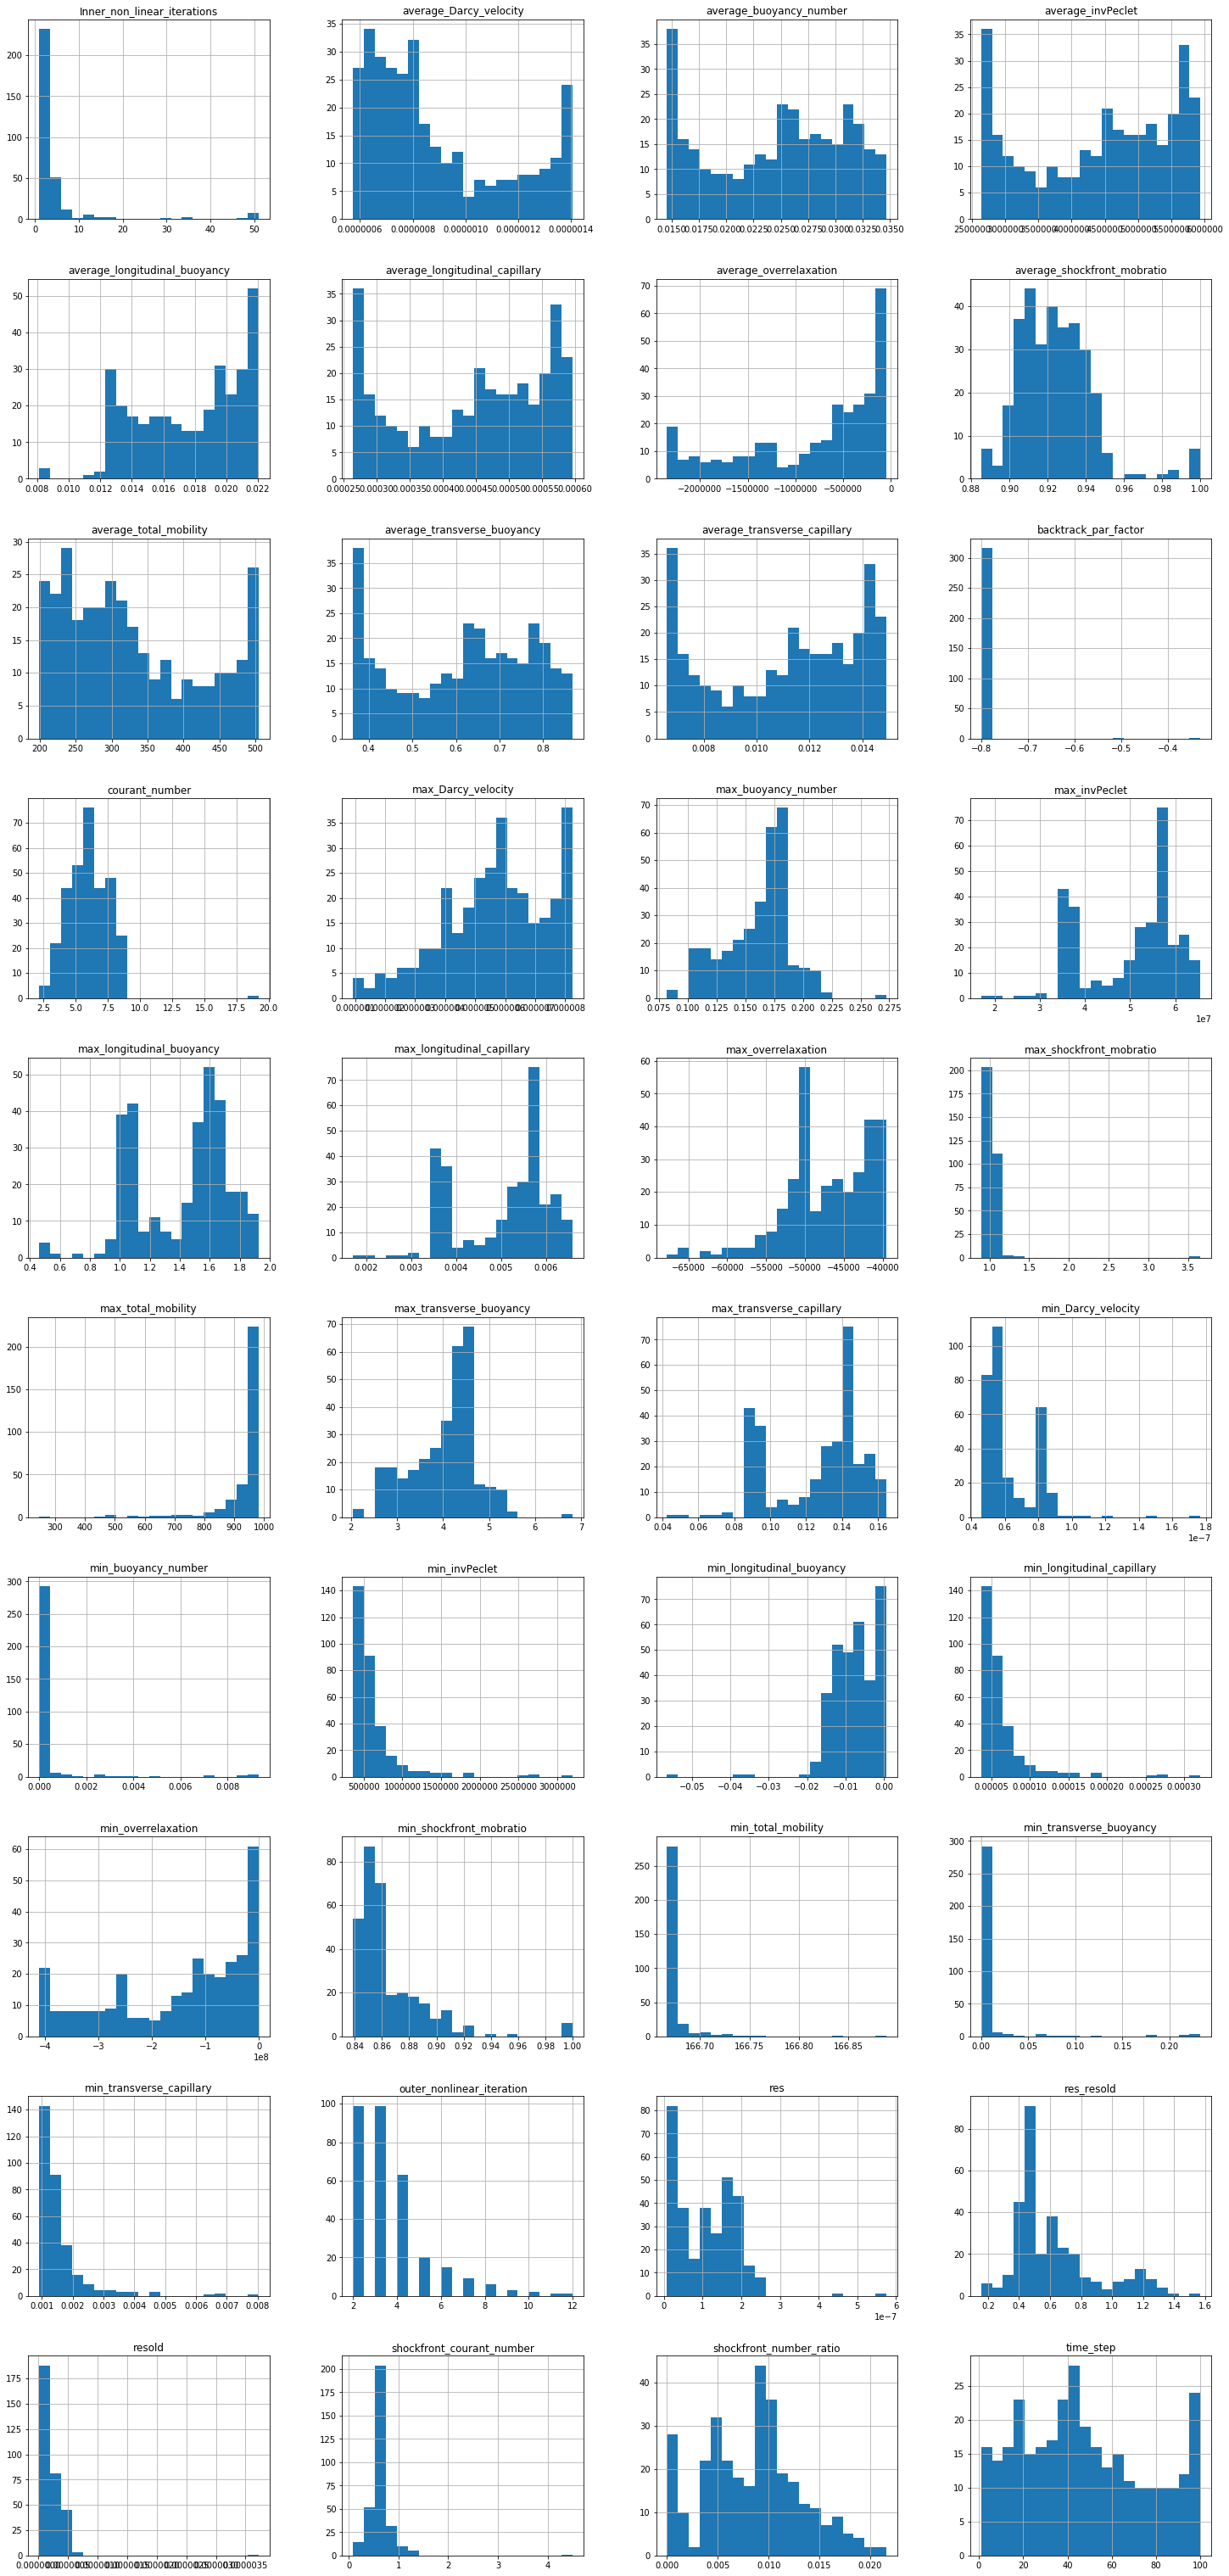

In [55]:
df2.iloc[:,9:].hist(alpha=1.,figsize = (25,55), layout=(10,4), bins=20);
# norm_df.iloc[:,8:42].hist(alpha=1.,figsize = (20,30), bins=20);

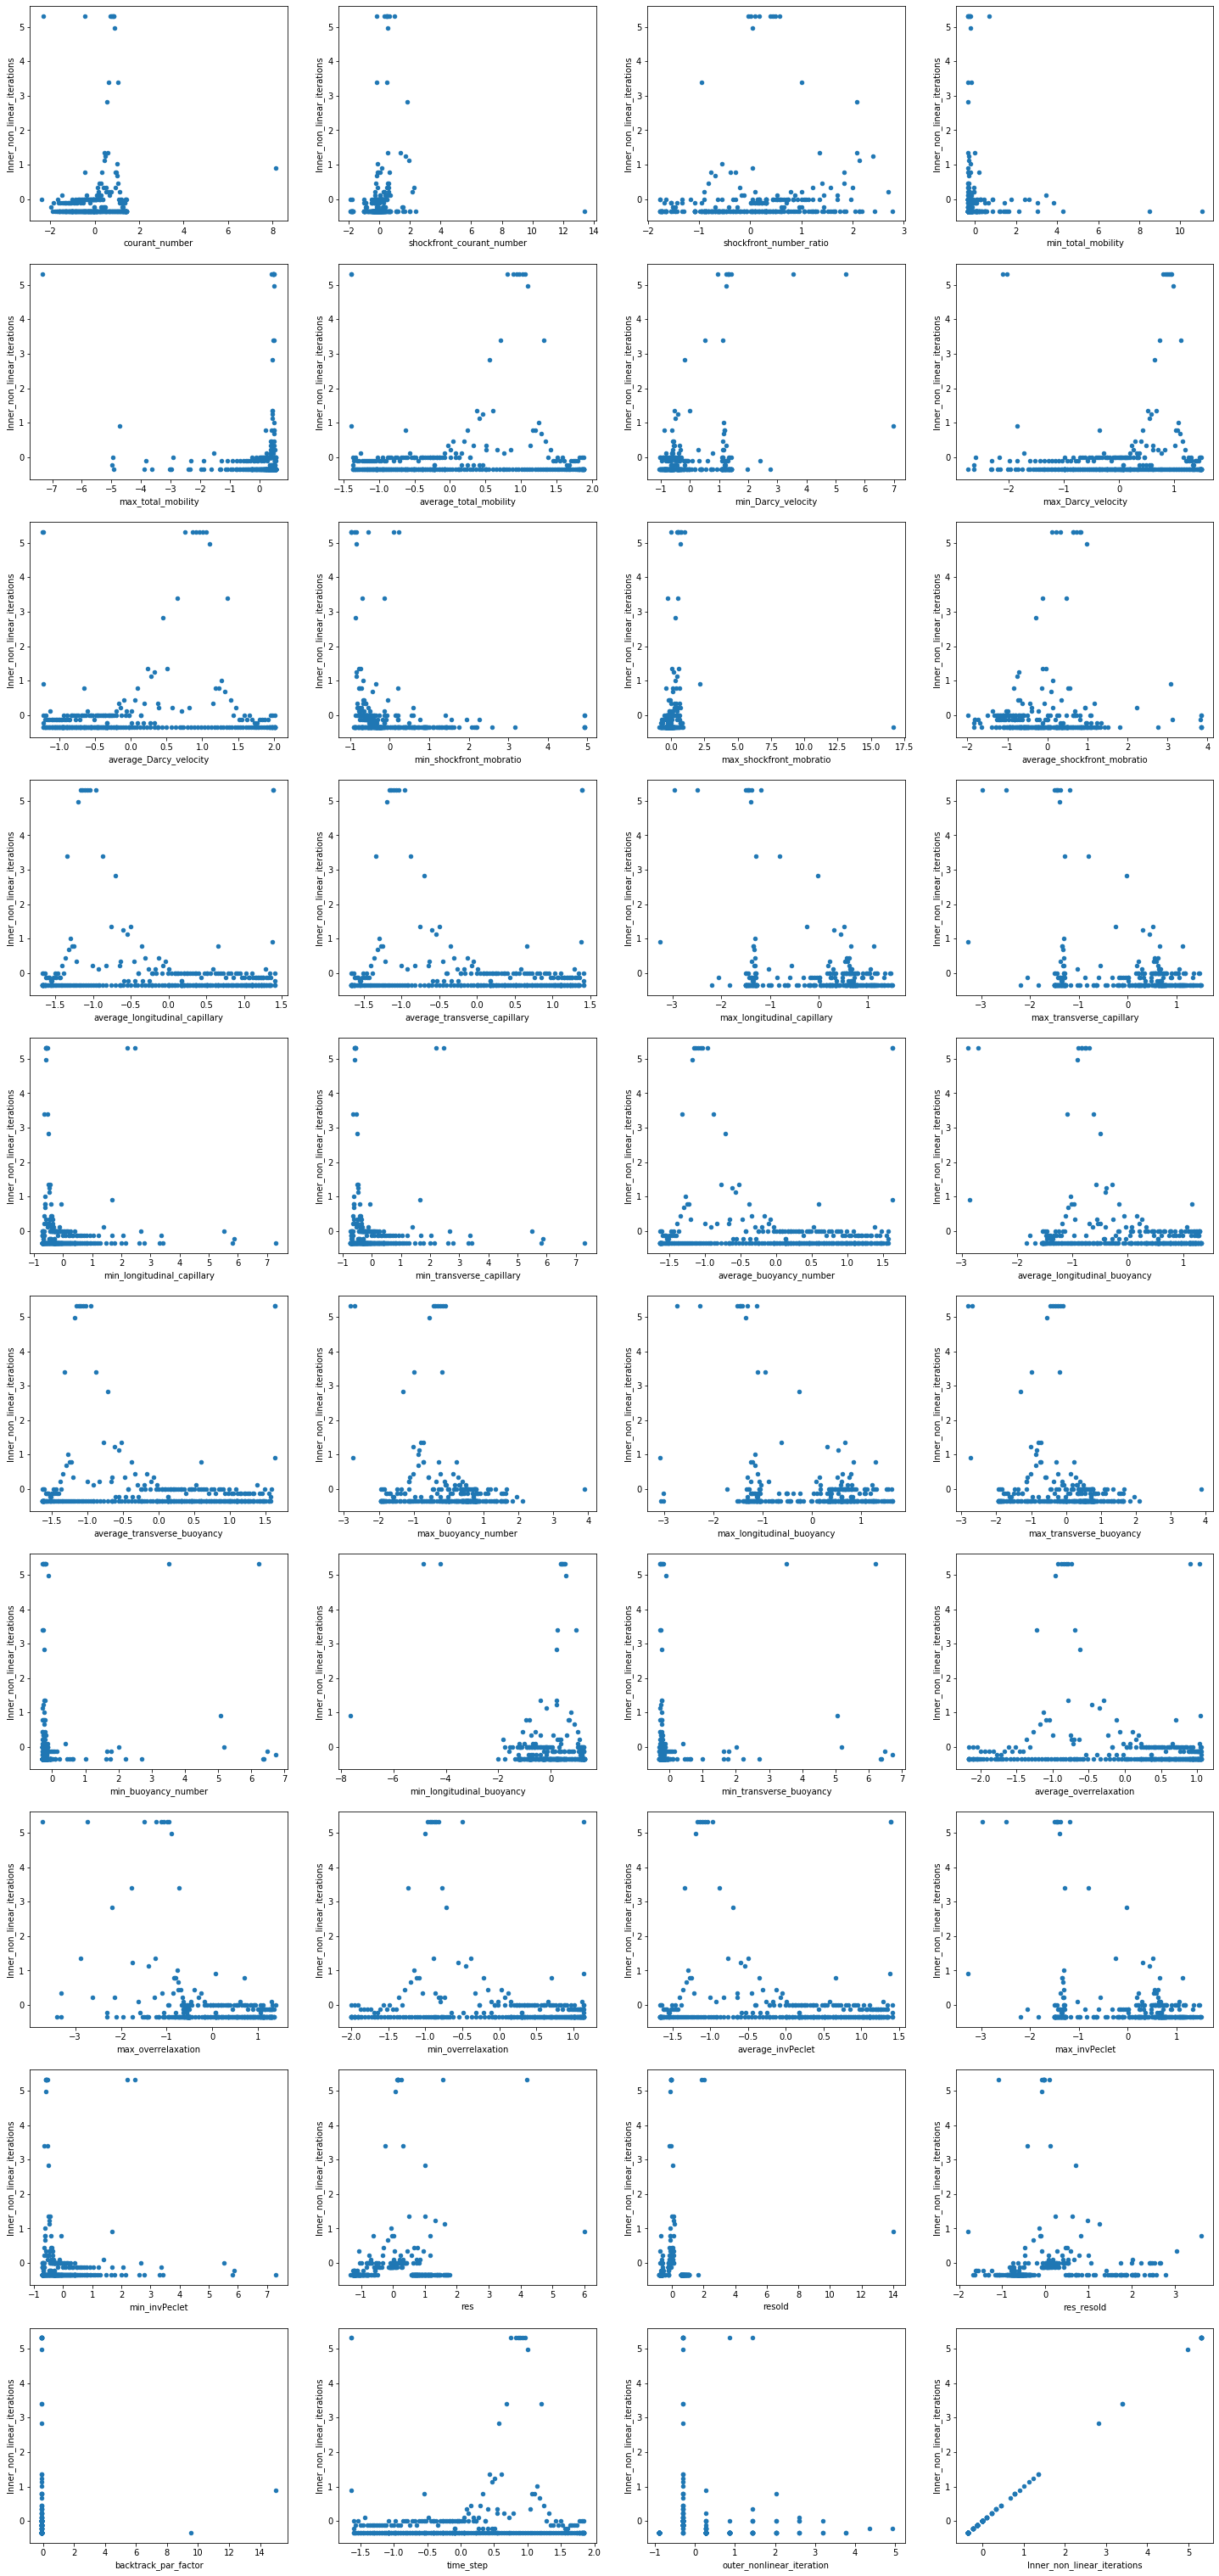

In [56]:
fig, axes = plt.subplots(10, 4, figsize=[25,55])
for i in range(0,40):
    #df2.plot.scatter(x=i+9, y=48,  ax=axes[i//4,i%4]);
    norm_df2.plot.scatter(x=i+9, y=48,  ax=axes[i//4,i%4])
#for i in range(39,40):
#    fig.delaxes(axes[i//4,i%4])

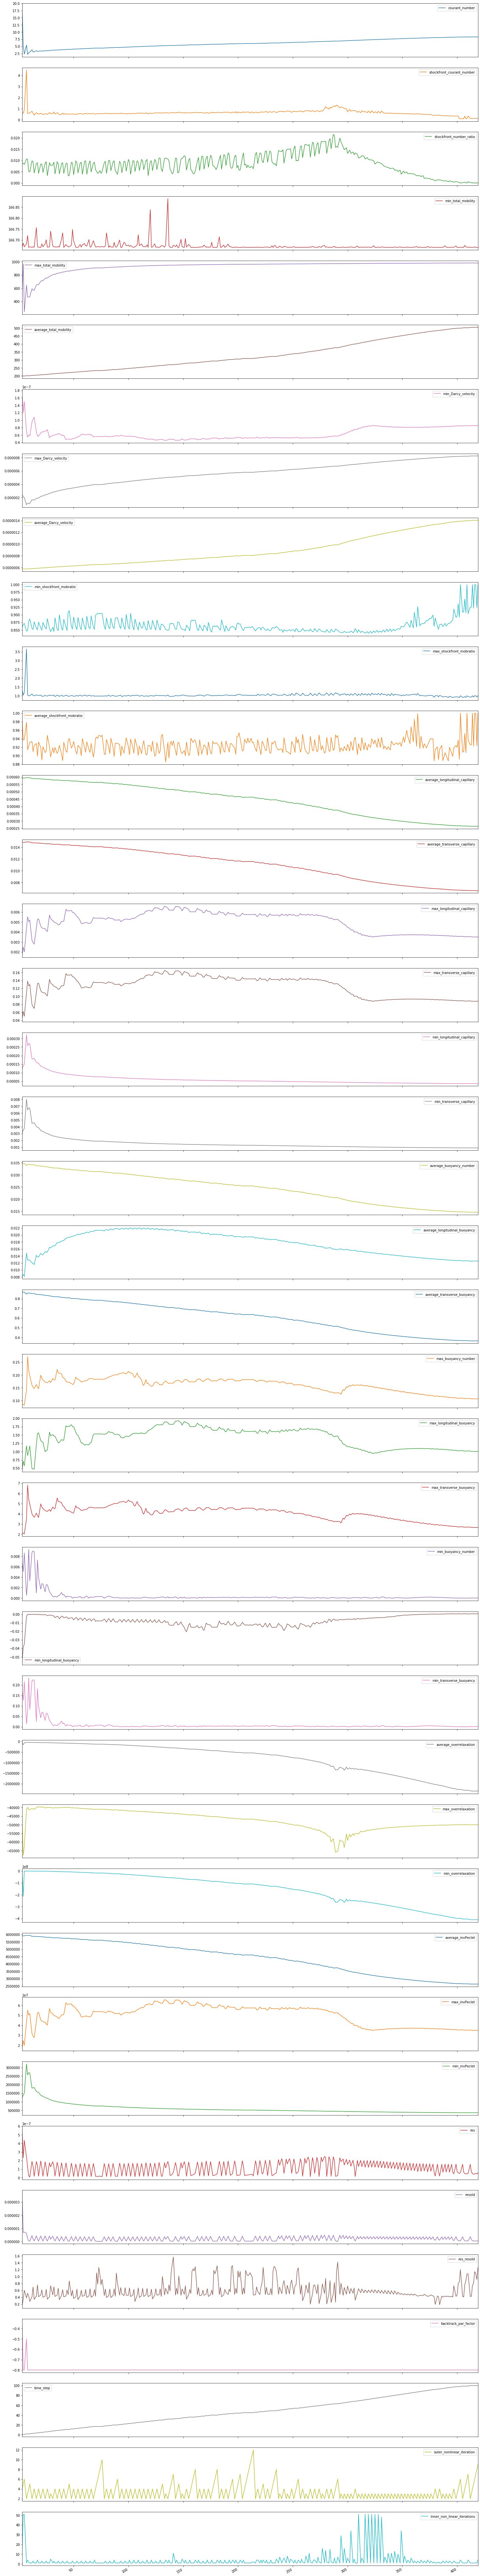

In [57]:
df2.iloc[:,9:].plot(subplots=True, figsize=(25, 160));

In [58]:
df2_corr_matrix = df2.corr()
#df2_corr_matrix['Inner_non_linear_iterations'].sort_values(ascending=False)
abs(df2_corr_matrix['Inner_non_linear_iterations']).sort_values(ascending=False)

Inner_non_linear_iterations       1.000000
max_overrelaxation                0.363637
min_Darcy_velocity                0.345891
max_longitudinal_capillary        0.300730
max_invPeclet                     0.300730
max_transverse_capillary          0.300730
max_longitudinal_buoyancy         0.288240
average_longitudinal_buoyancy     0.251089
max_buoyancy_number               0.199374
max_transverse_buoyancy           0.199374
min_shockfront_mobratio           0.179199
res                               0.175483
min_overrelaxation                0.155016
average_transverse_capillary      0.148029
average_invPeclet                 0.148029
average_longitudinal_capillary    0.148029
min_transverse_buoyancy           0.141685
min_buoyancy_number               0.141685
shockfront_courant_number         0.138757
average_transverse_buoyancy       0.136933
average_buoyancy_number           0.136933
shockfront_number_ratio           0.134669
courant_number                    0.134125
average_tot

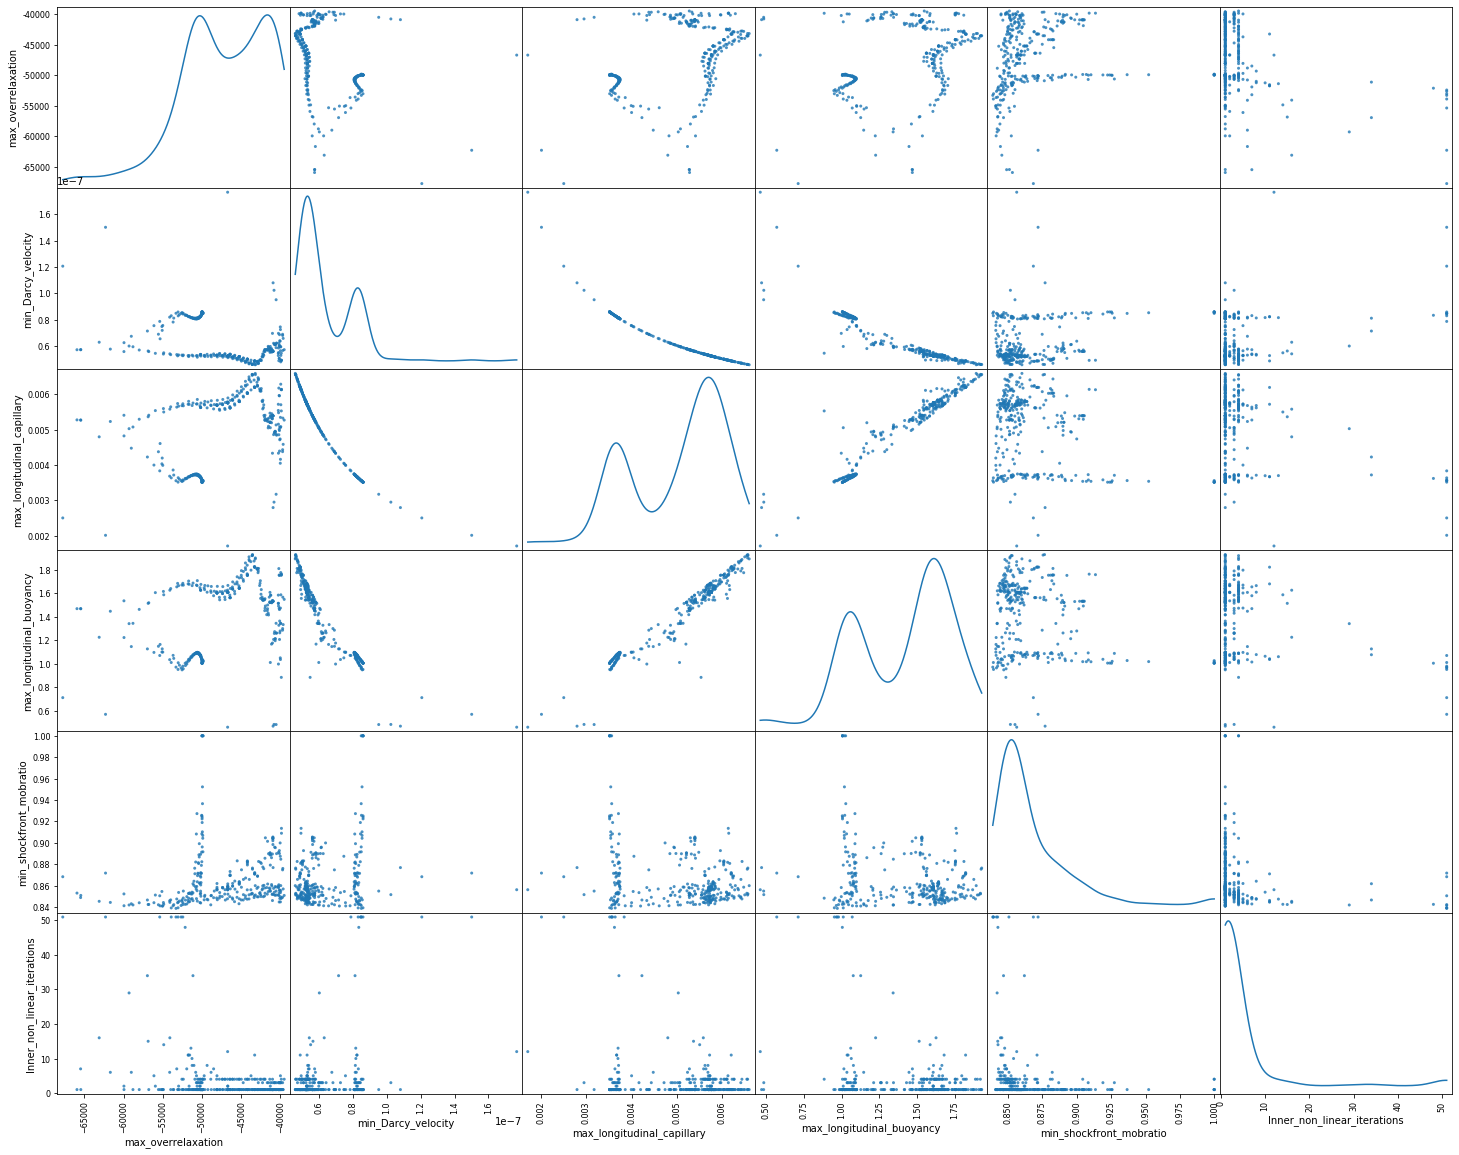

In [63]:
attributes = ['max_overrelaxation', 
              'min_Darcy_velocity', 
              'max_longitudinal_capillary', 
              'max_longitudinal_buoyancy', 
              'min_shockfront_mobratio', 
              'Inner_non_linear_iterations']
pd.plotting.scatter_matrix(df2[attributes], figsize=(25,20), alpha=0.8, diagonal='kde');

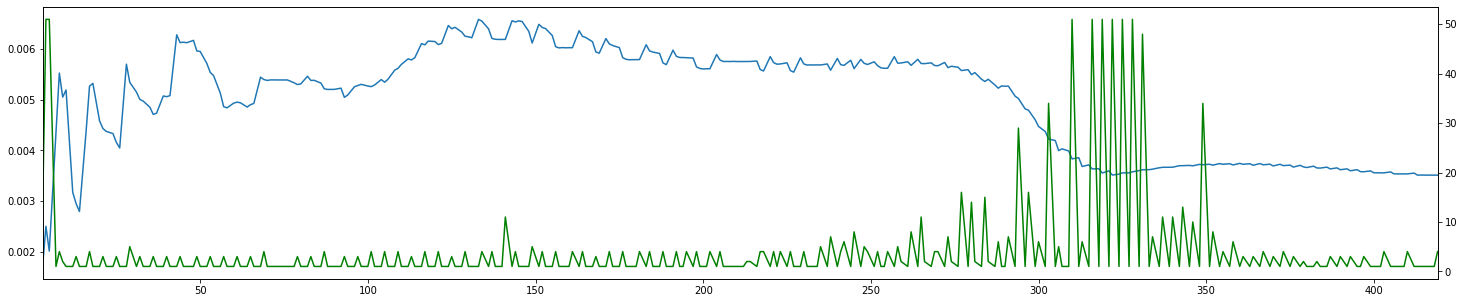

In [60]:
df2['max_longitudinal_capillary'].plot(figsize=(25, 5))
df2['Inner_non_linear_iterations'].plot(secondary_y=True, style='g')

In [61]:
df2_corr_matrix = df2.corr()
#df2_corr_matrix['Inner_non_linear_iterations'].sort_values(ascending=False)
abs(df2_corr_matrix['res']).sort_values(ascending=False)

res                               1.000000
resold                            0.816558
outer_nonlinear_iteration         0.610103
shockfront_number_ratio           0.519193
min_shockfront_mobratio           0.433241
average_shockfront_mobratio       0.344920
backtrack_par_factor              0.334944
res_resold                        0.282308
max_overrelaxation                0.272102
min_Darcy_velocity                0.269069
shockfront_courant_number         0.255574
average_longitudinal_buoyancy     0.248762
courant_number                    0.229688
max_shockfront_mobratio           0.181829
max_transverse_buoyancy           0.177783
max_buoyancy_number               0.177783
Inner_non_linear_iterations       0.175483
max_transverse_capillary          0.172456
max_longitudinal_capillary        0.172456
max_invPeclet                     0.172456
max_longitudinal_buoyancy         0.163779
min_buoyancy_number               0.158345
min_transverse_buoyancy           0.158345
max_total_m